# Predicted Growth
This notebook contains the following sections
### - Preparation
### - Preliminary Visualisation
### - Trend analysis with Linear Regression
### - Forcasting with Auto ARIMA

### Preparation


In [4]:
# Importing Libraries for analysis

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
warnings.filterwarnings("ignore", module="statsmodels")

In [5]:
# Read the CSV file to load the rental data from DATA VIC
data = pd.read_csv("../data/raw/Moving annual rent by suburb - March quarter 2023.csv", header=[0,1], index_col=0)

# Check data structure visually
data.head()

,Mar 2000,Unnamed: 2_level_0,Jun 2000,Unnamed: 4_level_0,Sep 2000,Unnamed: 6_level_0,Dec 2000,Unnamed: 8_level_0,Mar 2001,Unnamed: 10_level_0,...,Mar 2022,Unnamed: 178_level_0,Jun 2022,Unnamed: 180_level_0,Sep 2022,Unnamed: 182_level_0,Dec 2022,Unnamed: 184_level_0,Mar 2023,Unnamed: 186_level_0
,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
Albert Park-Middle Park-West St Kilda,"1,143",$260,"1,134",$260,"1,177",$270,"1,178",$275,"1,208",$275,...,867,$500,855,$515,881,$500,832,$525,786,$545
Armadale,733,$200,737,$200,738,$205,739,$210,718,$215,...,805,$430,851,$450,852,$450,840,$460,751,$490
Carlton North,864,$260,814,$260,799,$265,736,$270,718,$270,...,581,$580,535,$595,547,$600,546,$600,490,$620
Carlton-Parkville,"1,339",$260,"1,304",$260,"1,300",$260,"1,320",$260,"1,273",$260,...,"6,143",$310,"6,018",$319,"6,871",$340,"6,627",$350,"6,690",$400
CBD-St Kilda Rd,"2,132",$320,"2,264",$320,"2,358",$320,"2,361",$320,"2,591",$320,...,"17,845",$365,"16,792",$390,"18,284",$419,"17,627",$450,"17,426",$500


In [6]:
# Basic data cleaning
data.replace('-', np.nan, inplace=True)

# Convert to float for calculations in regression
for column in data.columns:
    if 'Median' in column[1]:
        data[column] = data[column].str.replace('$', '').astype(float)

In [7]:
# Create a list to hold the new column names
new_columns = []

# Iterate through the current columns
for col in data.columns:
    # If the column name contains "Unnamed", it's a median column
    if "Unnamed" in col[1]:
        # Extract the month and year from the previous column name in the new_columns list
        month_year = new_columns[-1].split(" ")[0]
        new_columns.append(f"{month_year} Median")
    else:
        # It's a count column, so just append "Count" to the column name
        new_columns.append(f"{col[0]} Count")

data.columns = new_columns

# Display the modified DataFrame
data.head()


,Mar 2000 Count,Unnamed: 2_level_0 Count,Jun 2000 Count,Unnamed: 4_level_0 Count,Sep 2000 Count,Unnamed: 6_level_0 Count,Dec 2000 Count,Unnamed: 8_level_0 Count,Mar 2001 Count,Unnamed: 10_level_0 Count,...,Mar 2022 Count,Unnamed: 178_level_0 Count,Jun 2022 Count,Unnamed: 180_level_0 Count,Sep 2022 Count,Unnamed: 182_level_0 Count,Dec 2022 Count,Unnamed: 184_level_0 Count,Mar 2023 Count,Unnamed: 186_level_0 Count
Albert Park-Middle Park-West St Kilda,"1,143",260.0,"1,134",260.0,"1,177",270.0,"1,178",275.0,"1,208",275.0,...,867,500.0,855,515.0,881,500.0,832,525.0,786,545.0
Armadale,733,200.0,737,200.0,738,205.0,739,210.0,718,215.0,...,805,430.0,851,450.0,852,450.0,840,460.0,751,490.0
Carlton North,864,260.0,814,260.0,799,265.0,736,270.0,718,270.0,...,581,580.0,535,595.0,547,600.0,546,600.0,490,620.0
Carlton-Parkville,"1,339",260.0,"1,304",260.0,"1,300",260.0,"1,320",260.0,"1,273",260.0,...,"6,143",310.0,"6,018",319.0,"6,871",340.0,"6,627",350.0,"6,690",400.0
CBD-St Kilda Rd,"2,132",320.0,"2,264",320.0,"2,358",320.0,"2,361",320.0,"2,591",320.0,...,"17,845",365.0,"16,792",390.0,"18,284",419.0,"17,627",450.0,"17,426",500.0


In [8]:
new_columns = []

for i, col in enumerate(data.columns):
    if "Unnamed" in col:
        month_year = new_columns[i-1].split(" ")[0] + " " + new_columns[i-1].split(" ")[1]
        new_columns.append(f"{month_year} Median")
    else:
        new_columns.append(col)

data.columns = new_columns

data.head()

,Mar 2000 Count,Mar 2000 Median,Jun 2000 Count,Jun 2000 Median,Sep 2000 Count,Sep 2000 Median,Dec 2000 Count,Dec 2000 Median,Mar 2001 Count,Mar 2001 Median,...,Mar 2022 Count,Mar 2022 Median,Jun 2022 Count,Jun 2022 Median,Sep 2022 Count,Sep 2022 Median,Dec 2022 Count,Dec 2022 Median,Mar 2023 Count,Mar 2023 Median
Albert Park-Middle Park-West St Kilda,"1,143",260.0,"1,134",260.0,"1,177",270.0,"1,178",275.0,"1,208",275.0,...,867,500.0,855,515.0,881,500.0,832,525.0,786,545.0
Armadale,733,200.0,737,200.0,738,205.0,739,210.0,718,215.0,...,805,430.0,851,450.0,852,450.0,840,460.0,751,490.0
Carlton North,864,260.0,814,260.0,799,265.0,736,270.0,718,270.0,...,581,580.0,535,595.0,547,600.0,546,600.0,490,620.0
Carlton-Parkville,"1,339",260.0,"1,304",260.0,"1,300",260.0,"1,320",260.0,"1,273",260.0,...,"6,143",310.0,"6,018",319.0,"6,871",340.0,"6,627",350.0,"6,690",400.0
CBD-St Kilda Rd,"2,132",320.0,"2,264",320.0,"2,358",320.0,"2,361",320.0,"2,591",320.0,...,"17,845",365.0,"16,792",390.0,"18,284",419.0,"17,627",450.0,"17,426",500.0


### - Preliminary Visualisation

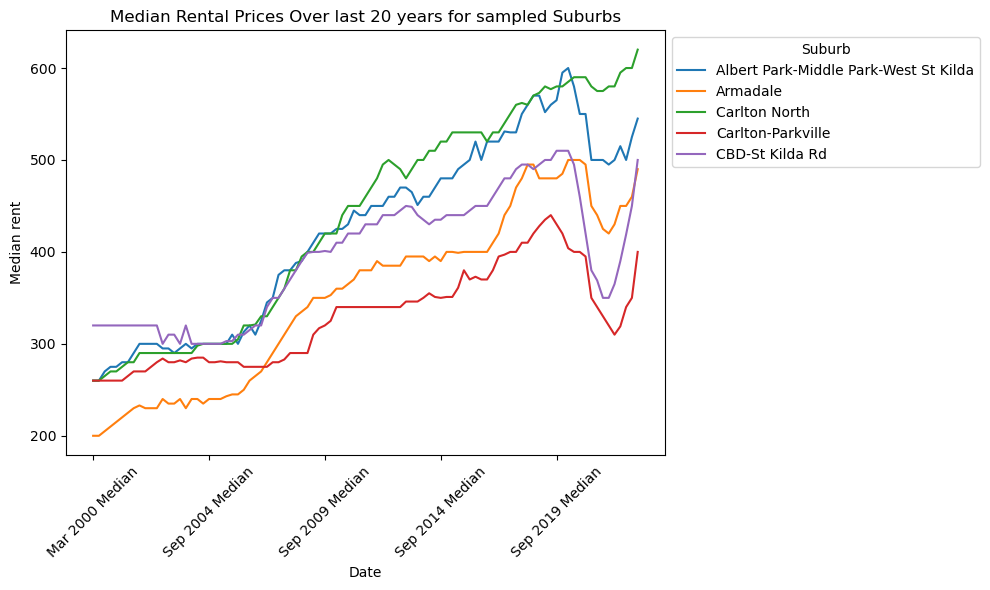

In [9]:
# Selecting a the first 5 suburbs for visualization
suburbs_to_plot = ['Albert Park-Middle Park-West St Kilda', 'Armadale', 'Carlton North', 'Carlton-Parkville', 'CBD-St Kilda Rd']

# Extracting the 'Median' columns
median_columns = [col for col in data.columns if 'Median' in col]

plt.figure(figsize=(10, 6))

for suburb in suburbs_to_plot:
    data.loc[suburb, median_columns].plot(label=suburb)

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Suburb')
plt.title("Median Rental Prices Over last 20 years for sampled Suburbs")
plt.xlabel("Date")
plt.ylabel("Median rent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/median_metro_prices_20.png')
plt.show()

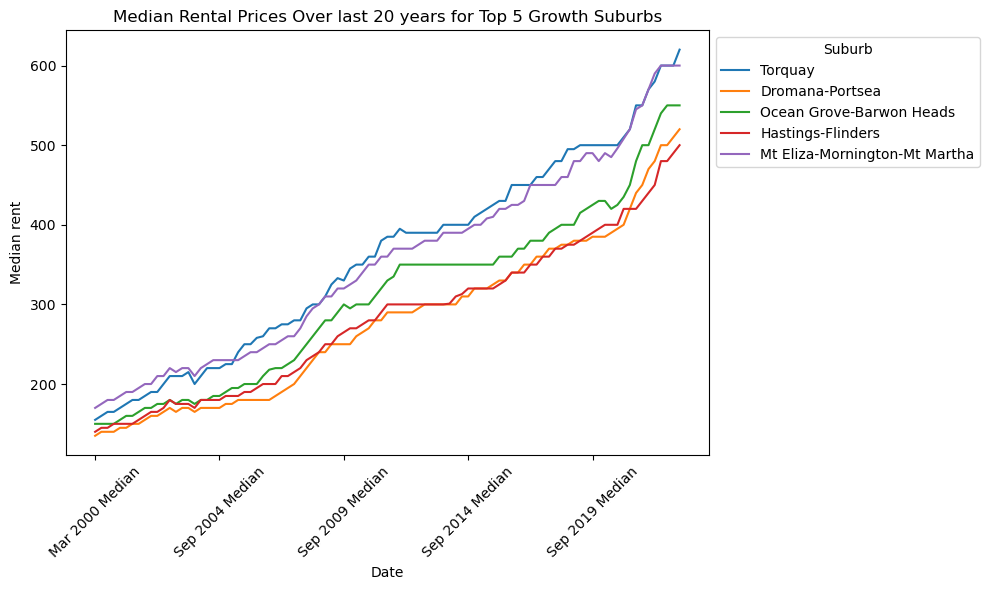

In [10]:
# Extracting the 'Median' columns
median_columns = [col for col in data.columns if 'Median' in col]

# Calculating the CAGR for each suburb
cagr = ((data[median_columns].iloc[:, -1] / data[median_columns].iloc[:, 0]) ** (1/(len(median_columns)/4)) - 1)

# Sorting the suburbs by CAGR in descending order and selecting the top 10
top_10_growth_suburbs = cagr.sort_values(ascending=False).head(5).index

plt.figure(figsize=(10, 6))

# Iterating through the top 10 suburbs to plot their median rental prices
for suburb in top_10_growth_suburbs:
    data.loc[suburb, median_columns].plot(label=suburb)

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Suburb')
plt.title("Median Rental Prices Over last 20 years for Top 5 Growth Suburbs")
plt.xlabel("Date")
plt.ylabel("Median rent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/median_rural_prices_20.png')
plt.show()

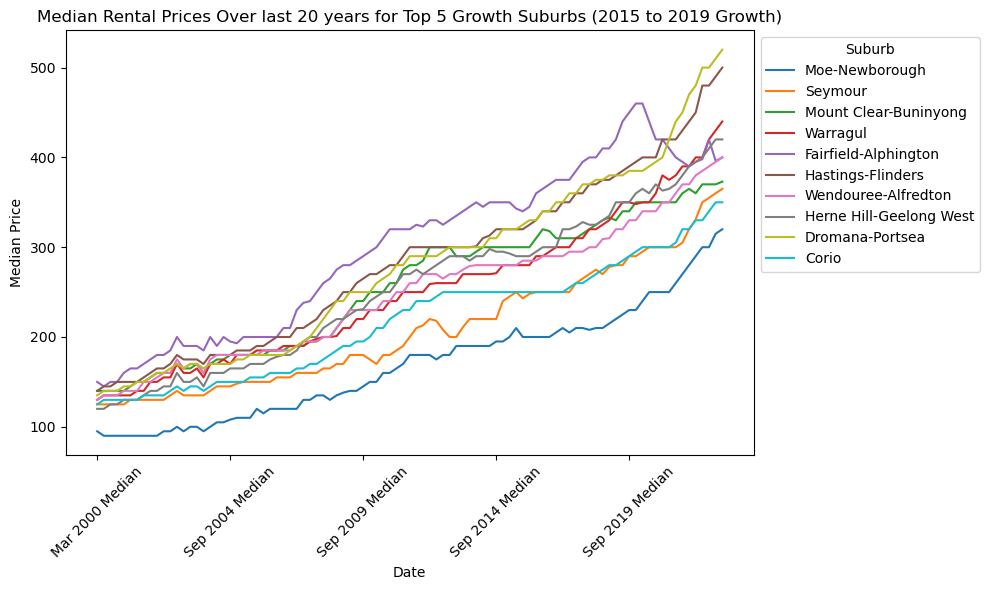

In [11]:

# Identifying columns for the period 2015 to 2019
growth_period_columns = median_columns[-60:-12]

# Calculating the CAGR 
cagr_2015_to_2019 = ((data[growth_period_columns].iloc[:, -1] / data[growth_period_columns].iloc[:, 0]) ** (1/(len(growth_period_columns)/4)) - 1)

# Sorting the suburbs by CAGR and selecting the top 10
top_10_growth_suburbs_2015_to_2019 = cagr_2015_to_2019.sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 6))

# Iterating through the top 10 suburbs to plot their median rental prices over the entire 20-year period
for suburb in top_10_growth_suburbs_2015_to_2019:
    data.loc[suburb, median_columns].plot(label=suburb)

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Suburb')
plt.title("Median Rental Prices Over last 20 years for Top 5 Growth Suburbs (2015 to 2019 Growth)")
plt.xlabel("Date")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/median_nocovid_prices_20.png')
plt.show()

From the above visualisations we can see that suburbs with the highest predicted growth suffered least from the price drop during the pandemic. These areas are also located further out in rural regions of Victoria



### Trend analysis with Linear Regression


In [12]:
# Separate the columns based on their names (So that it is simpler to perform Linear Regression)
count_columns = [col for col in data.columns if 'Count' in col]
median_columns = [col for col in data.columns if 'Median' in col]

# Create two new DataFrames
df_count = data[count_columns]
df_median = data[median_columns]

df_median

,Mar 2000 Median,Jun 2000 Median,Sep 2000 Median,Dec 2000 Median,Mar 2001 Median,Jun 2001 Median,Sep 2001 Median,Dec 2001 Median,Mar 2002 Median,Jun 2002 Median,...,Dec 2020 Median,Mar 2021 Median,Jun 2021 Median,Sep 2021 Median,Dec 2021 Median,Mar 2022 Median,Jun 2022 Median,Sep 2022 Median,Dec 2022 Median,Mar 2023 Median
Albert Park-Middle Park-West St Kilda,260.0,260.0,270.0,275.0,275.0,280.0,280.0,290.0,300.0,300.0,...,550.0,500.0,500.0,500.0,495.0,500.0,515.0,500.0,525.0,545.0
Armadale,200.0,200.0,205.0,210.0,215.0,220.0,225.0,230.0,233.0,230.0,...,495.0,450.0,440.0,425.0,420.0,430.0,450.0,450.0,460.0,490.0
Carlton North,260.0,260.0,265.0,270.0,270.0,275.0,280.0,280.0,290.0,290.0,...,590.0,580.0,575.0,575.0,580.0,580.0,595.0,600.0,600.0,620.0
Carlton-Parkville,260.0,260.0,260.0,260.0,260.0,260.0,265.0,270.0,270.0,270.0,...,395.0,350.0,340.0,330.0,320.0,310.0,319.0,340.0,350.0,400.0
CBD-St Kilda Rd,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,...,420.0,380.0,369.0,350.0,350.0,365.0,390.0,419.0,450.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wanagaratta,125.0,125.0,130.0,130.0,130.0,130.0,130.0,135.0,135.0,135.0,...,308.0,320.0,330.0,350.0,360.0,370.0,380.0,380.0,380.0,380.0
Warragul,130.0,135.0,135.0,135.0,135.0,135.0,140.0,140.0,150.0,150.0,...,380.0,375.0,380.0,390.0,390.0,400.0,400.0,420.0,430.0,440.0
Warrnambool,130.0,135.0,135.0,135.0,140.0,140.0,140.0,145.0,145.0,150.0,...,350.0,350.0,360.0,370.0,380.0,400.0,400.0,420.0,420.0,420.0
Wodonga,145.0,145.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,155.0,...,330.0,340.0,350.0,360.0,370.0,380.0,390.0,400.0,410.0,410.0


In [13]:
# Checking if there are any missing values
total_missing_values = df_median.isnull().sum().sum()
print(total_missing_values)

7


In [14]:
# Checking where the missing values are located
missing_rows = df_median[df_median.isnull().any(axis=1)]
missing_rows

,Mar 2000 Median,Jun 2000 Median,Sep 2000 Median,Dec 2000 Median,Mar 2001 Median,Jun 2001 Median,Sep 2001 Median,Dec 2001 Median,Mar 2002 Median,Jun 2002 Median,...,Dec 2020 Median,Mar 2021 Median,Jun 2021 Median,Sep 2021 Median,Dec 2021 Median,Mar 2022 Median,Jun 2022 Median,Sep 2022 Median,Dec 2022 Median,Mar 2023 Median
Docklands,NaN,340.0,NaN,NaN,NaN,NaN,NaN,NaN,320.0,340.0,...,460.0,420.0,400.0,400.0,400.0,420.0,450.0,480.0,500.0,550.0


In [15]:
# Docklands had to be removed because there was no suitible way to impute conseccutive missing data
df_median = df_median.drop("Docklands")

In [16]:
df_median = df_median.astype('float64')

In [17]:
# There was a "Total" column that needed to be dropped
df_median = df_median.drop("Group Total")

In [18]:
# Convert the data from wide format to long format to fit them into Linear regression
df_long = df_median.stack().reset_index()
df_long.columns = ['Suburb', 'Date', 'Median']

In [19]:
# Assign a numeric value to each time period
date_columns = df_median.columns
date_to_time = {date: i for i, date in enumerate(date_columns)}
df_long['Time'] = df_long['Date'].map(date_to_time)

In [20]:
# Regression Analysis
# Dictionary to hold regression results
regression_results = {}
for suburb in df_long['Suburb'].unique():
    subset = df_long[df_long['Suburb'] == suburb]
    X = subset['Time'].values.reshape(-1, 1)
    y = subset['Median']
    
    X = sm.add_constant(X)  # adding a constant
    model = sm.OLS(y, X).fit()
    
    regression_results[suburb] = {
        'slope': model.params[1],
        'intercept': model.params[0],
        'r_squared': model.rsquared,
        'std_dev': np.std(subset['Median'])
    }

# Convert regression results to DataFrame for easier viewing
df_results = pd.DataFrame(regression_results).T

df_results

,slope,intercept,r_squared,std_dev
Albert Park-Middle Park-West St Kilda,3.528818,255.962987,0.913192,100.707624
Armadale,3.300017,196.935009,0.927502,93.448637
Carlton North,4.227207,238.903080,0.965069,117.351462
Carlton-Parkville,1.589127,254.099773,0.725743,50.872285
CBD-St Kilda Rd,1.990297,300.920410,0.642296,67.727420
...,...,...,...,...
Traralgon,2.517855,112.026976,0.961007,70.045739
Wanagaratta,2.454631,104.774935,0.952250,68.600103
Warragul,2.923131,111.896231,0.970688,80.913829
Warrnambool,2.648297,128.500795,0.950450,74.082610


In [21]:
# Suburbs with the highest slope (rate of growth)
top_slope_suburbs = df_results.nlargest(10, 'slope')

# Suburbs with the highest standard deviation (most variability)
top_std_dev_suburbs = df_results.nlargest(10, 'std_dev')

print("Top", 10, "suburbs with the highest rate of growth in rental prices:")
print(top_slope_suburbs[['slope']])

print("\nTop", 10, "suburbs with the most variability in rental prices:")
print(top_std_dev_suburbs[['std_dev']])


Top 10 suburbs with the highest rate of growth in rental prices:
                                  slope
Brighton East                  5.725535
Brighton                       4.691836
Torquay                        4.604892
Mt Eliza-Mornington-Mt Martha  4.369703
Carlton North                  4.227207
Newport-Spotswood              4.096202
Fitzroy North-Clifton Hill     4.059080
Ocean Grove-Barwon Heads       3.956922
Hampton-Beaumaris              3.936625
Fitzroy                        3.926969

Top 10 suburbs with the most variability in rental prices:
                                  std_dev
Brighton East                  159.143812
Brighton                       133.439870
Torquay                        126.417430
Mt Eliza-Mornington-Mt Martha  120.530318
Carlton North                  117.351462
Fitzroy North-Clifton Hill     113.325030
Newport-Spotswood              113.114591
Fitzroy                        110.761362
Ocean Grove-Barwon Heads       110.099037
Hampton-Beaumar

The rental prices in these suburbs are not only increasing at a fast rate but are also experiencing significant fluctuations. This means that while there's a general upward trend, there are periods where the prices might dip or peak more than other suburbs. This could lead to potential instability if invested in.   

From an investment point of view, these suburbs can be seen having both higher potential returns (due to the rapid growth) and higher risks (due to the high variability). Investors or renters looking for stability might be wary of such areas, while those willing to take on more risk for potentially higher returns might be attracted to them.

In [22]:
# Filter data from the last 5 years
last_5_years = df_long['Time'].max() - 20
df_last_5_years = df_long[df_long['Time'] > last_5_years]

# Regression Analysis for the last 5 years
regression_results_5_years = {}
for suburb in df_last_5_years['Suburb'].unique():
    subset = df_last_5_years[df_last_5_years['Suburb'] == suburb].dropna()
    
    if len(subset['Time'].unique()) > 1:
        X = subset['Time'].values.reshape(-1, 1)
        y = subset['Median']
        
        X = sm.add_constant(X)  # adding a constant
        model = sm.OLS(y, X).fit()
        
        regression_results_5_years[suburb] = {
            'slope': model.params[1],
            'intercept': model.params[0],
            'r_squared': model.rsquared,
            'std_dev': np.std(subset['Median'])
        }
    else:
        print(f"No variation in Time for {suburb}")

df_results_5_years = pd.DataFrame(regression_results_5_years).T

# Extract top suburbs based on slope and std_dev for the last 5 years
top_n = 10
top_slope_suburbs_5_years = df_results_5_years.nlargest(top_n, 'slope')
top_std_dev_suburbs_5_years = df_results_5_years.nlargest(top_n, 'std_dev')

print("Top", top_n, "suburbs with the highest rate of growth in rental prices in the last 5 years:")
print(top_slope_suburbs_5_years[['slope']])

print("\nTop", top_n, "suburbs with the most variability in rental prices in the last 5 years:")
print(top_std_dev_suburbs_5_years[['std_dev']])


Top 10 suburbs with the highest rate of growth in rental prices in the last 5 years:
                                  slope
Ocean Grove-Barwon Heads       8.939850
Mt Eliza-Mornington-Mt Martha  8.347368
Dromana-Portsea                8.345865
Benalla                        7.620301
Sale-Maffra                    7.477444
Portland                       7.289474
Torquay                        7.142857
Warrnambool                    6.796992
Hastings-Flinders              6.684211
Wanagaratta                    6.645865

Top 10 suburbs with the most variability in rental prices in the last 5 years:
                                 std_dev
Southbank                      62.696312
CBD-St Kilda Rd                59.217312
Ocean Grove-Barwon Heads       54.230987
Dromana-Portsea                51.004902
Mt Eliza-Mornington-Mt Martha  50.362784
Benalla                        44.532993
Sale-Maffra                    44.341713
Torquay                        44.274711
Carlton-Parkville         

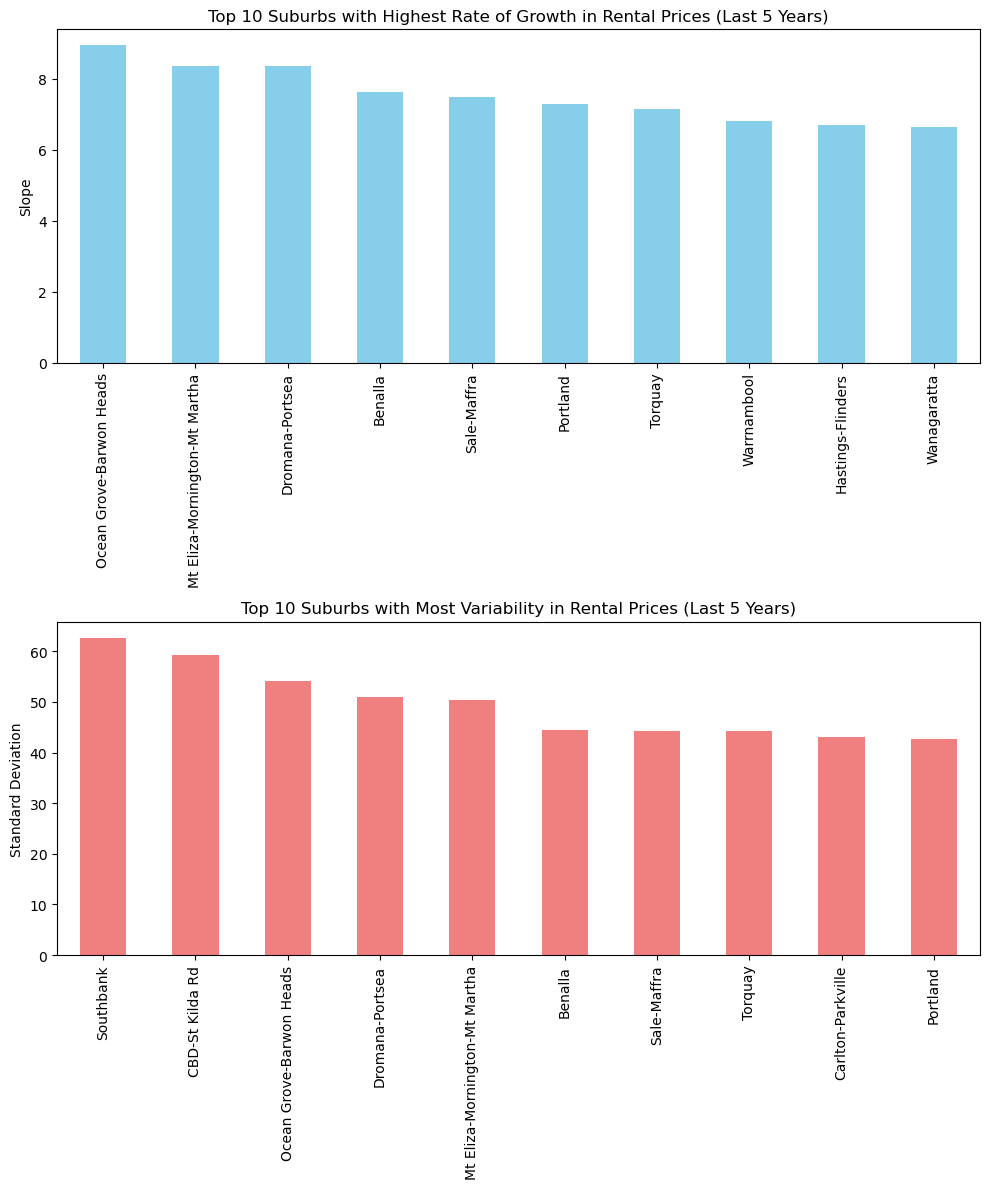

In [23]:
# Bar plots to present top 10 suburbs
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

top_slope_suburbs_5_years['slope'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Suburbs with Highest Rate of Growth in Rental Prices (Last 5 Years)')
axes[0].set_ylabel('Slope')

top_std_dev_suburbs_5_years['std_dev'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Top 10 Suburbs with Most Variability in Rental Prices (Last 5 Years)')
axes[1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.savefig('../plots/highest_growth_variability.png')
plt.show()


### Forcasting with Auto ARIMA

In [24]:
# Converting columns to fate time format for arima analysis
df_median.columns = pd.to_datetime(df_median.columns.str.extract('(\w{3} \d{4})')[0], format='%b %Y')

In [25]:
# for the purpose of ranking by CAGR we need to store the three year prediction and growth rate
predicted_value_values = {}  
growth_rate_values = {}

for suburb in df_median.index:
    suburb_data = df_median.loc[suburb]

    # Auto ARIMA model fitted (Assumed no seasonal change, ignoring errors)
    stepwise_model = auto_arima(suburb_data, seasonal=False,
                                error_action="ignore", suppress_warnings=True, 
                                stepwise=True)

    # Predict the next 3 years 
    forecast = stepwise_model.predict(n_periods=12)

    # Get the last forecasted value
    last_forecasted_value = forecast.values[-1]
    
    # Get the last known value
    last_known_value = suburb_data[-1]
    
    # Calculate the growth rate with CAGR formula
    growth_rate = ((last_forecasted_value / last_known_value) ** (1/3)) - 1

    predicted_value_values[suburb] = last_forecasted_value  # Storing the predicted value
    growth_rate_values[suburb] = growth_rate

# Convert to a DataFrame for easier sorting and indexing
growth_df = pd.DataFrame(list(predicted_value_values.items()), columns=['Suburb', 'Predicted Value in 3 Years'])
growth_df['Growth Rate'] = growth_rate_values.values()

# Sort by the growth rate and take the top 10
top_10_growth_suburbs = growth_df.sort_values('Growth Rate', ascending=False).head(10)

# Display the top 10 suburbs with the highest growth rate, their predicted values, and growth rates
top_10_growth_suburbs.to_csv('../data/curated/10_growth_suburbs')

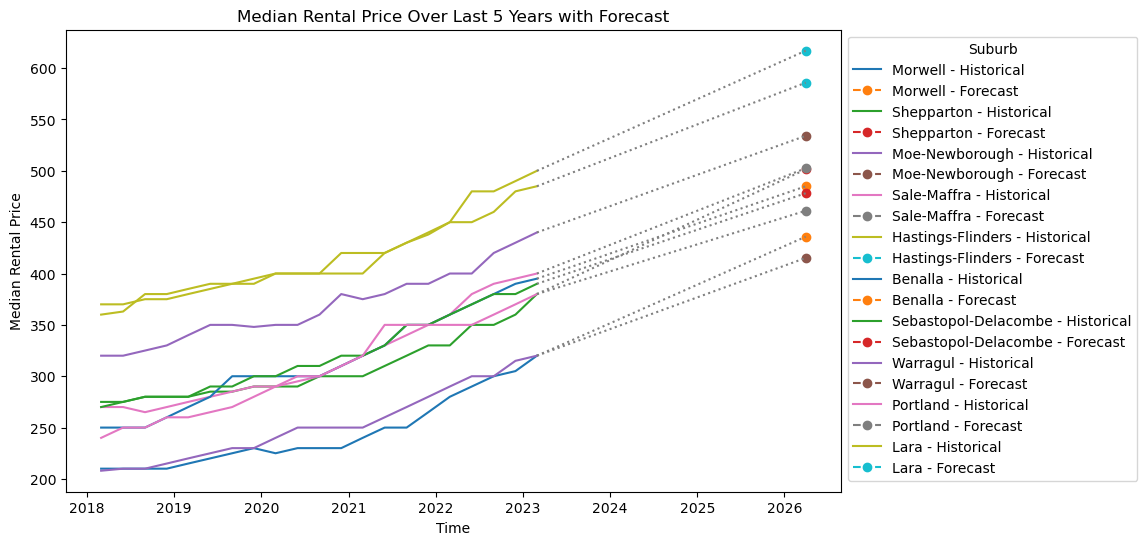

In [ ]:
# Select the data for the last 5 years
last_5_years_data = df_median.loc[:, '2018-03-01':]

# Prepare a figure
plt.figure(figsize=(10, 6))

# Loop through each of the top 10 suburbs
for index, row in top_10_growth_suburbs.iterrows():
    suburb, forecasted_price = row['Suburb'], row['Predicted Value in 3 Years']
    
    # Get the past 5 yrs for this suburb
    suburb_data = last_5_years_data.loc[suburb]
    
    # time index for the forecasted price (3 years)
    forecast_index = pd.date_range(start=suburb_data.index[-1] + pd.DateOffset(months=3*12), periods=1, freq='Q')
    
    # Plot the historical data
    plt.plot(suburb_data.index, suburb_data, label=f'{suburb} - Historical')
    
    # Plot the forecasted price
    plt.plot(forecast_index, [forecasted_price], marker='o', linestyle='--', label=f'{suburb} - Forecast')

    plt.plot([suburb_data.index[-1], forecast_index[0]], [suburb_data[-1], forecasted_price], linestyle=':', color='grey')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Suburb')
plt.xlabel('Time')
plt.ylabel('Median Rental Price')
plt.title('Median Rental Price Over Last 5 Years with Forecast')
plt.savefig('../plots/growth_forecast_20.png')
plt.show()


In [ ]:
# Function to run the forcast on affordable suburbs
def compute_growth_and_predicted_rent(suburb_names):
    results = {}
    for suburb in suburb_names:
        suburb_data = df_median.loc[suburb]

        stepwise_model = auto_arima(suburb_data, seasonal=False,
                                    error_action="ignore", suppress_warnings=True,
                                    stepwise=True)

        forecast = stepwise_model.predict(n_periods=12)

    
        last_forecasted_value = forecast.values[-1]

        last_known_value = suburb_data[-1]

        growth_rate = ((last_forecasted_value / last_known_value) ** (1/3)) - 1

        # Store the results
        results[suburb] = {
            'Suburb': suburb,
            'Predicted Rent in 3 Years': last_forecasted_value,
            'Growth Rate': growth_rate
        }
    
    return pd.DataFrame(results).T  # Transpose to have suburbs as rows

# List of suburbs of interest
suburbs_of_interest = ['Caulfield', 'South Yarra', 'Fitzroy', 'Brunswick', 'Brighton']

# Get the growth rate and predicted rent for the suburbs of interest
growth_and_predicted_rent_df = compute_growth_and_predicted_rent(suburbs_of_interest)

# Display the results
growth_and_predicted_rent_df

,Suburb,Predicted Rent in 3 Years,Growth Rate
Caulfield,Caulfield,596.705422,0.064269
South Yarra,South Yarra,488.22921,0.005682
Fitzroy,Fitzroy,633.404255,0.023944
Brunswick,Brunswick,541.344963,0.037315
Brighton,Brighton,779.255319,0.024347


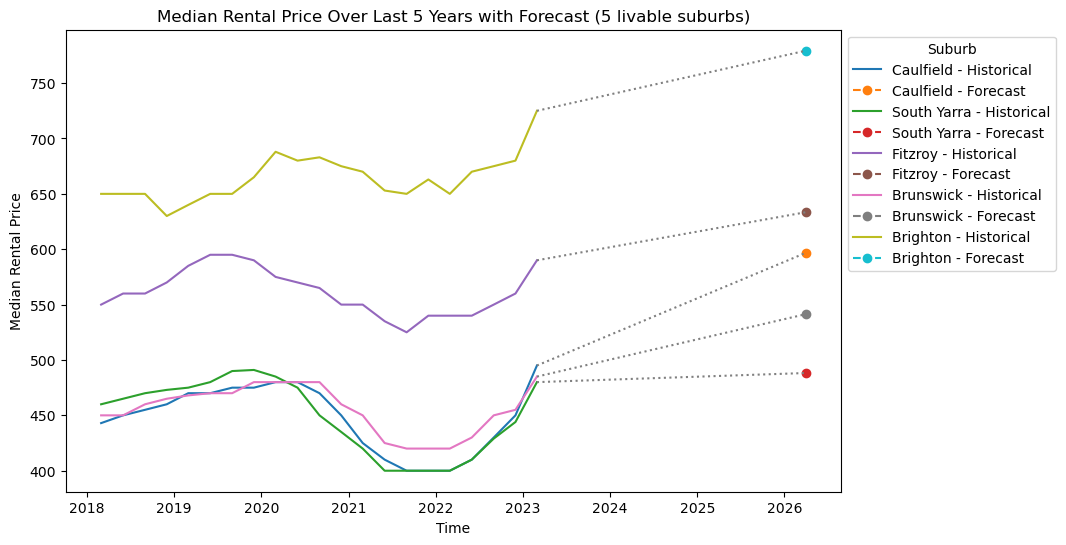

In [ ]:
# Select the data for the last 5 years
last_5_years_data = df_median.loc[:, '2018-03-01':]

# Prepare a figure
plt.figure(figsize=(10, 6))

# Loop through each of the 5 livable suburbs
for index, row in growth_and_predicted_rent_df.iterrows():
    suburb, forecasted_price = row['Suburb'], row['Predicted Rent in 3 Years']
    
    suburb_data = last_5_years_data.loc[suburb]
    
    forecast_index = pd.date_range(start=suburb_data.index[-1] + pd.DateOffset(months=3*12), periods=1, freq='Q')
    
    plt.plot(suburb_data.index, suburb_data, label=f'{suburb} - Historical')
    
    plt.plot(forecast_index, [forecasted_price], marker='o', linestyle='--', label=f'{suburb} - Forecast')

    plt.plot([suburb_data.index[-1], forecast_index[0]], [suburb_data[-1], forecasted_price], linestyle=':', color='grey')

# Add legend and labels
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Suburb')
plt.xlabel('Time')
plt.ylabel('Median Rental Price')
plt.title('Median Rental Price Over Last 5 Years with Forecast (5 livable suburbs)')
plt.savefig('../plots/growth_liveable.png')
plt.show()